In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
import numpy as np
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define constants
img_height, img_width = 299, 299  # InceptionV3 requires input shape (299, 299)
num_classes = 10
batch_size = 32

# Load InceptionV3 model with pre-trained ImageNet weights
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Build a new model on top of the convolutional base
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Online metal defect classification-20240326T072403Z-001/Online metal defect classification/train_data',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Online metal defect classification-20240326T072403Z-001/Online metal defect classification/test_data',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Train the model
history = model.fit(train_generator, epochs=55, validation_data=test_generator)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)

# Print the test accuracy
print("Test Accuracy:", test_accuracy)


Found 362 images belonging to 10 classes.
Found 207 images belonging to 10 classes.
Epoch 1/55
12/12 [==============================] - 11s 519ms/step - loss: 84.8838 - accuracy: 0.2155 - val_loss: 47.1161 - val_accuracy: 0.2367
Epoch 2/55
12/12 [==============================] - 6s 502ms/step - loss: 14.8389 - accuracy: 0.5470 - val_loss: 11.1193 - val_accuracy: 0.4251
Epoch 3/55
12/12 [==============================] - 5s 401ms/step - loss: 2.4893 - accuracy: 0.7293 - val_loss: 5.4203 - val_accuracy: 0.4396
Epoch 4/55
12/12 [==============================] - 5s 421ms/step - loss: 0.6750 - accuracy: 0.8757 - val_loss: 6.6903 - val_accuracy: 0.4493
Epoch 5/55
12/12 [==============================] - 6s 467ms/step - loss: 0.2317 - accuracy: 0.9558 - val_loss: 6.4485 - val_accuracy: 0.5411
Epoch 6/55
12/12 [==============================] - 5s 417ms/step - loss: 0.1238 - accuracy: 0.9807 - val_loss: 6.3600 - val_accuracy: 0.5169
Epoch 7/55
12/12 [==============================] - 6s 469m

Found 362 images belonging to 10 classes.
12/12 [==============================] - 5s 327ms/step
Confusion Matrix (Training Dataset):
[[41  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 [ 0  0 39  0  0  0  0  0  0  0]
 [ 0  0  0  7  0  0  0  0  0  0]
 [ 0  0  0  0 35  0  1  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 24  0  0  0]
 [ 0  0  0  0  0  1  0 40  0  0]
 [ 0  0  0  0  0  0  0  0 54  0]
 [ 0  0  0  0  0  0  0  0  0 30]]


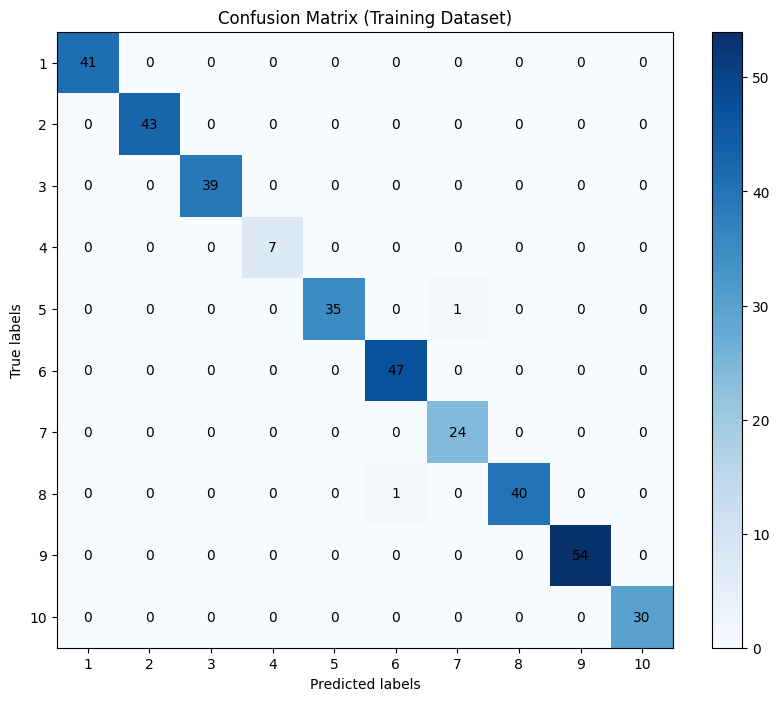

In [25]:
# Load training data using ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Online metal defect classification-20240326T072403Z-001/Online metal defect classification/train_data',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Important to keep the order of predictions consistent with true labels
)

# Make predictions
predictions_train = model.predict(train_generator)
predicted_classes_train = np.argmax(predictions_train, axis=1)

# Get true labels
true_classes_train = train_generator.classes

# Compute confusion matrix
conf_matrix_train = confusion_matrix(true_classes_train, predicted_classes_train)

# Print confusion matrix with labels
print("Confusion Matrix (Training Dataset):")
print(conf_matrix_train)

# Plot confusion matrix with labels
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix_train, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Training Dataset)')
plt.colorbar()
plt.xticks(ticks=np.arange(len(class_labels)), labels=class_labels)
plt.yticks(ticks=np.arange(len(class_labels)), labels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Add numerical values
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, str(conf_matrix_train[i, j]), horizontalalignment='center', verticalalignment='center')

plt.show()


Found 207 images belonging to 10 classes.
7/7 [==============================] - 2s 302ms/step
Confusion Matrix:
[[ 4  1 10  0  0  2  0  2  2  3]
 [ 0 13  3  0  1  5  1  1  0  0]
 [ 0  0 15  0  1  3  0  0  2  0]
 [ 1  0  0  0  0  0  0  0  0  0]
 [ 4  1  3  1  7  1  2  3  0  0]
 [ 1  0  2  0  1 19  0  0  2  0]
 [ 2  0  2  0  1  4  4  3  0  0]
 [ 0  2  3  0  2  2  0 12  0  0]
 [ 0  0  2  0  1  2  0  0 27  1]
 [ 1  0  3  0  0  1  0  0  0 15]]


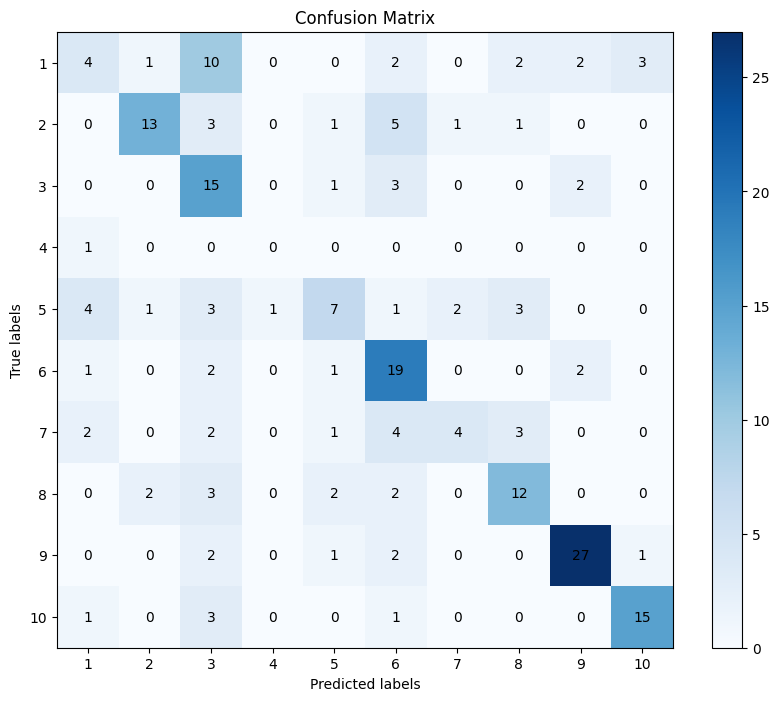

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load test data using ImageDataGenerator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Online metal defect classification-20240326T072403Z-001/Online metal defect classification/test_data',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Important to keep the order of predictions consistent with true labels
)

# Make predictions
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels
true_classes = test_generator.classes

# Define class labels
class_labels = [str(i) for i in range(1, 11)]

# Compute confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Print confusion matrix with labels
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix with labels
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(ticks=np.arange(len(class_labels)), labels=class_labels)
plt.yticks(ticks=np.arange(len(class_labels)), labels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Add numerical values
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', verticalalignment='center')

plt.show()


Epoch 1/10
12/12 [==============================] - 5s 444ms/step - loss: 0.0457 - accuracy: 0.9945 - val_loss: 5.3655 - val_accuracy: 0.5556
Epoch 2/10
12/12 [==============================] - 6s 476ms/step - loss: 0.0308 - accuracy: 0.9917 - val_loss: 4.9797 - val_accuracy: 0.5652
Epoch 3/10
12/12 [==============================] - 5s 420ms/step - loss: 0.0281 - accuracy: 0.9917 - val_loss: 5.1307 - val_accuracy: 0.5556
Epoch 4/10
12/12 [==============================] - 6s 500ms/step - loss: 0.0316 - accuracy: 0.9917 - val_loss: 5.2899 - val_accuracy: 0.5556
Epoch 5/10
12/12 [==============================] - 5s 405ms/step - loss: 0.0046 - accuracy: 0.9945 - val_loss: 4.9984 - val_accuracy: 0.5556
Epoch 6/10
12/12 [==============================] - 5s 407ms/step - loss: 0.0284 - accuracy: 0.9945 - val_loss: 5.0313 - val_accuracy: 0.5556
Epoch 7/10
12/12 [==============================] - 6s 450ms/step - loss: 0.0173 - accuracy: 0.9945 - val_loss: 5.0698 - val_accuracy: 0.5556
Epoch 

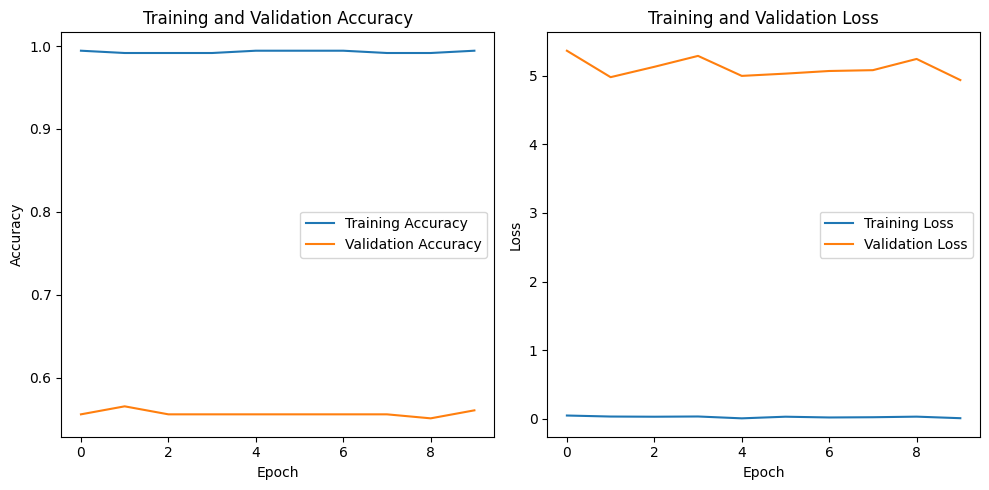

In [27]:
import matplotlib.pyplot as plt

# Train the model
history = model.fit(train_generator, epochs=10, validation_data=test_generator)

# Plot training accuracy and validation loss
plt.figure(figsize=(10, 5))

# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
